<a href="https://colab.research.google.com/github/ark1st/2020_AI/blob/master/ch3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import boston_housing
import pandas as pd
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [0]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [0]:
import numpy as np

def keras_model(train_data, train_targets, val_data, val_targets):
  model = build_model()

  model.fit(train_data, train_targets,
            epochs=100, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  return val_mae

In [0]:
sns.pairplot(pd.DataFrame(train_data))
print(keras_model(train_data, train_targets, test_data, test_targets))

2.539206027984619


In [0]:
#z_score
def z_score(train_data, train_targets, test_data, test_targets):
  mean = train_data.mean(axis=0)
  train_data -= mean
  std = train_data.std(axis=0)
  train_data /= std

  test_data -= mean
  test_data /= std
  return (train_data, train_targets, test_data, test_targets)

In [0]:
def median(train_data, train_targets, test_data, test_targets):
  median = np.median(train_data)
  train_data -= median 
  std = train_data.std(axis=0)
  train_data /= std

  test_data -= median 
  test_data /= std
  return (train_data, train_targets, test_data, test_targets)

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


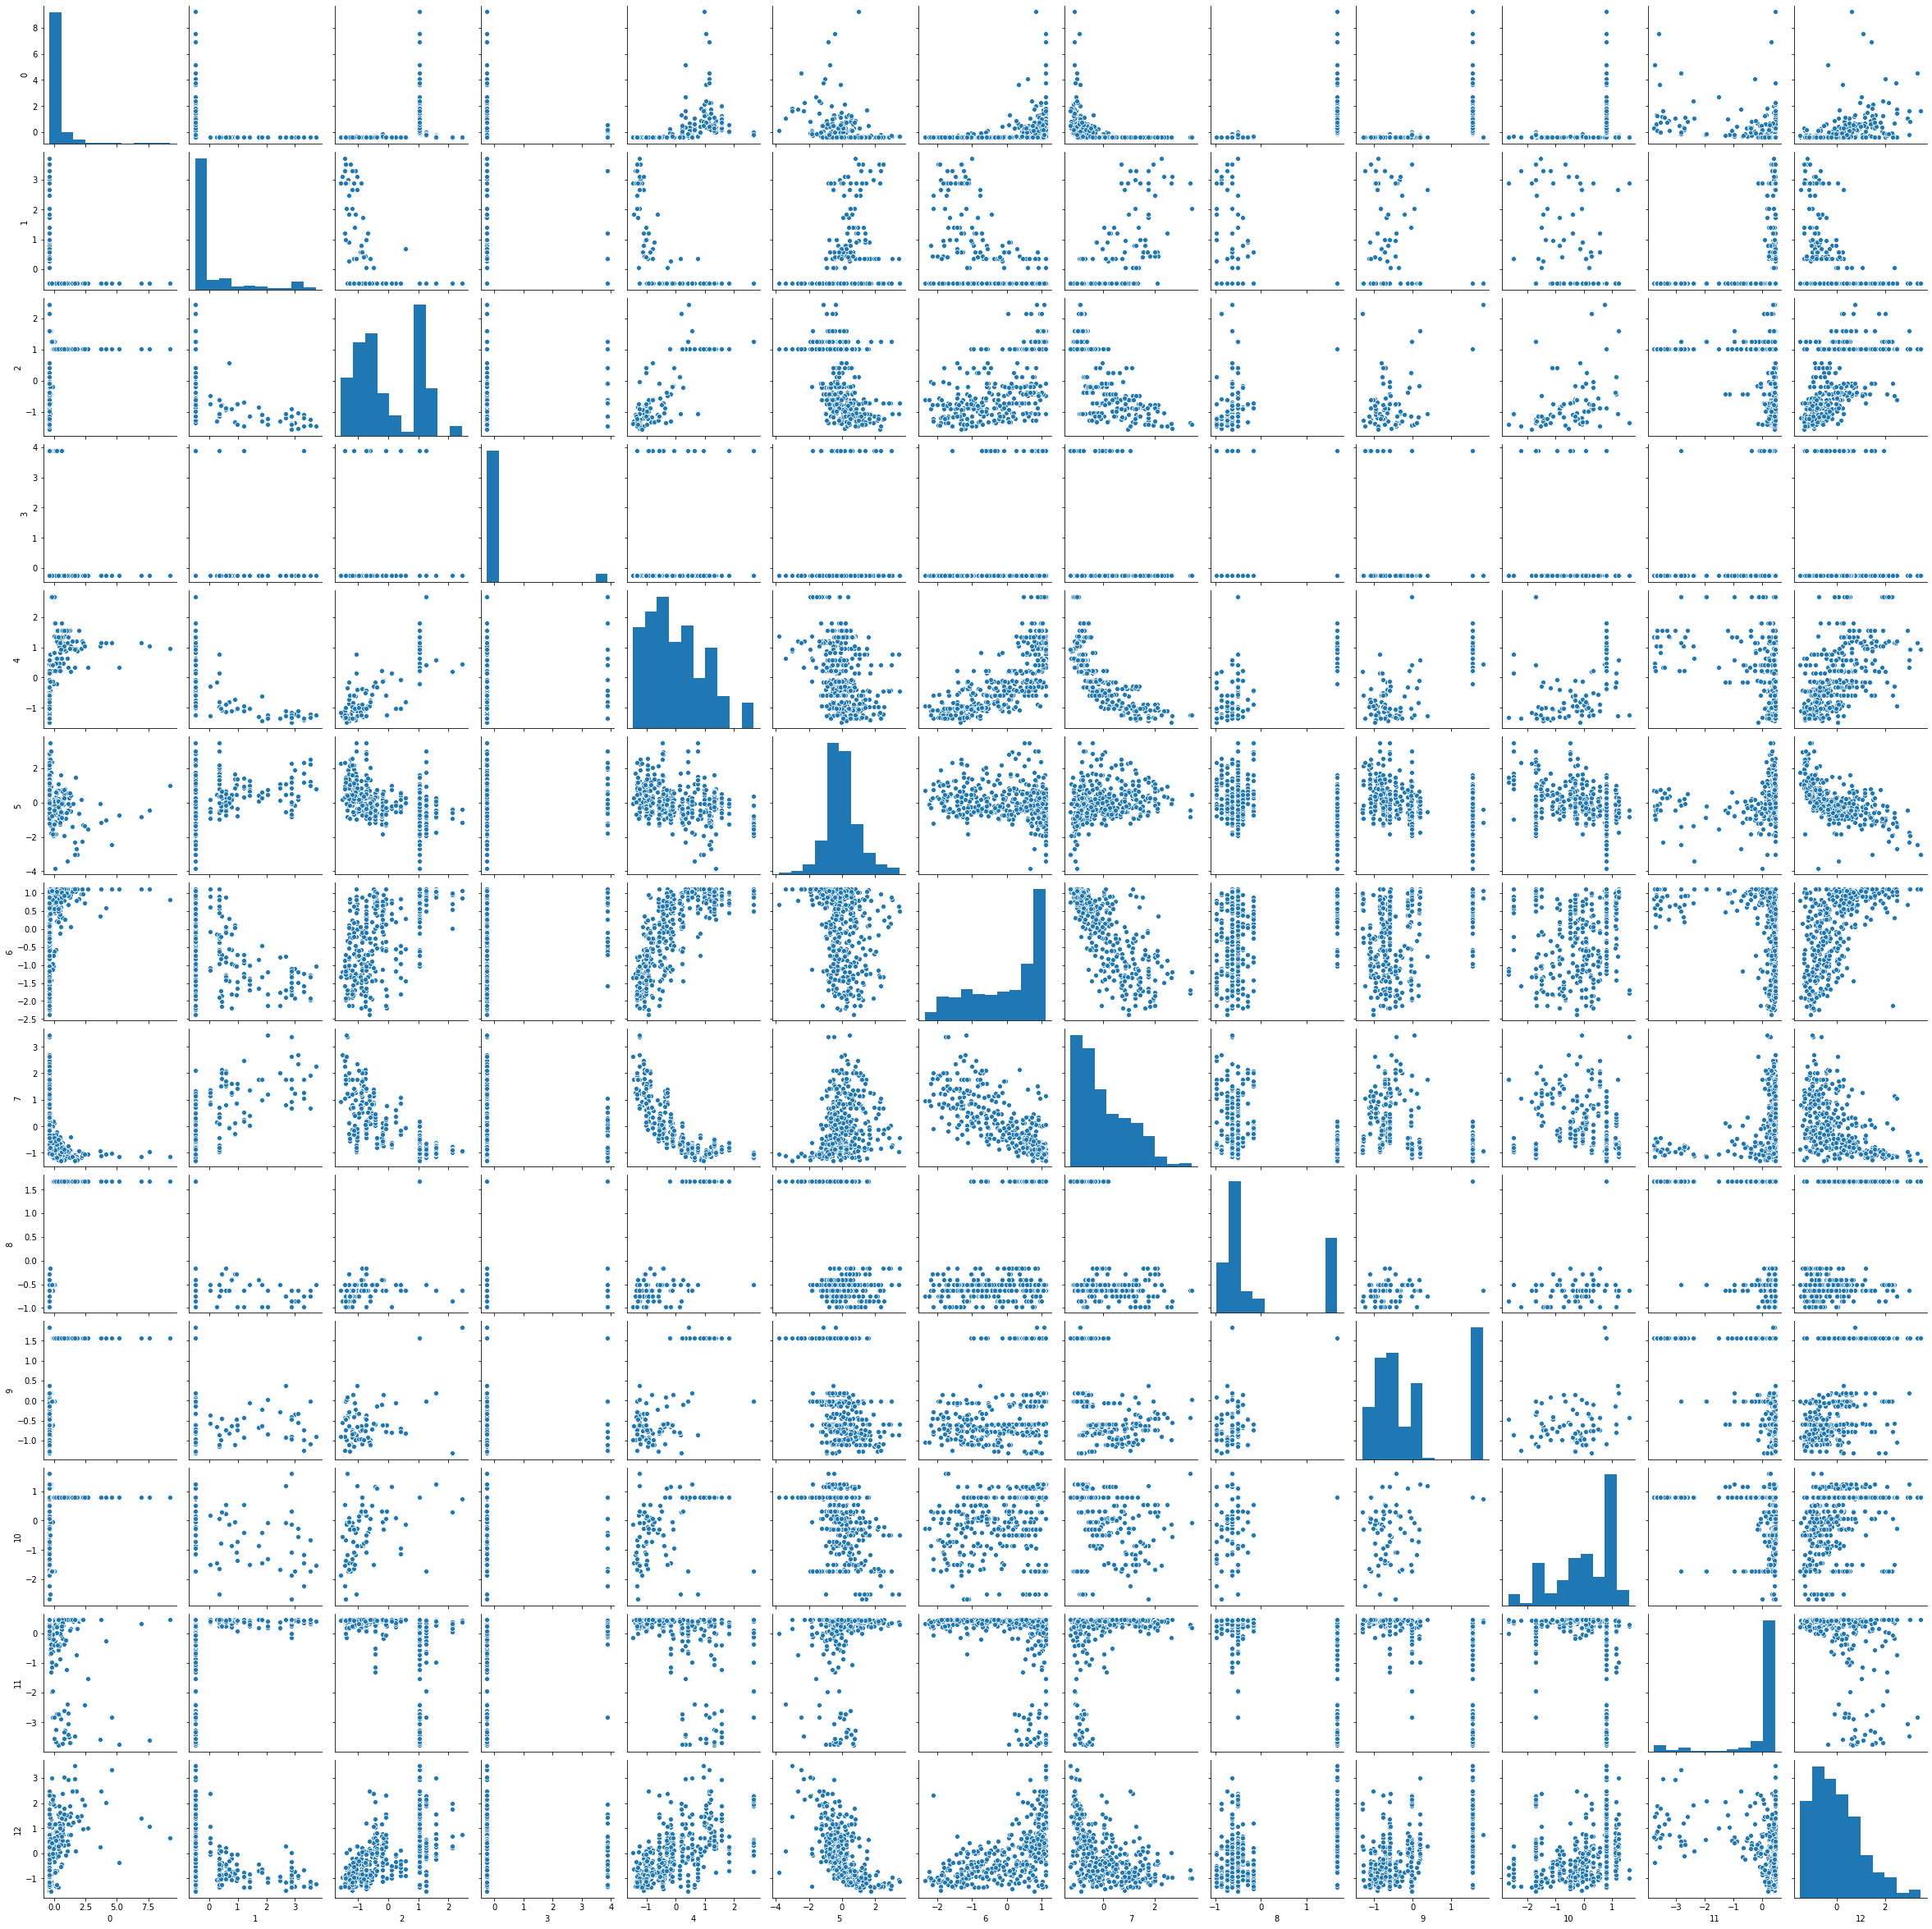

In [0]:
print(keras_model(X_train, y_train, X_test, y_test))
  

2.475560188293457


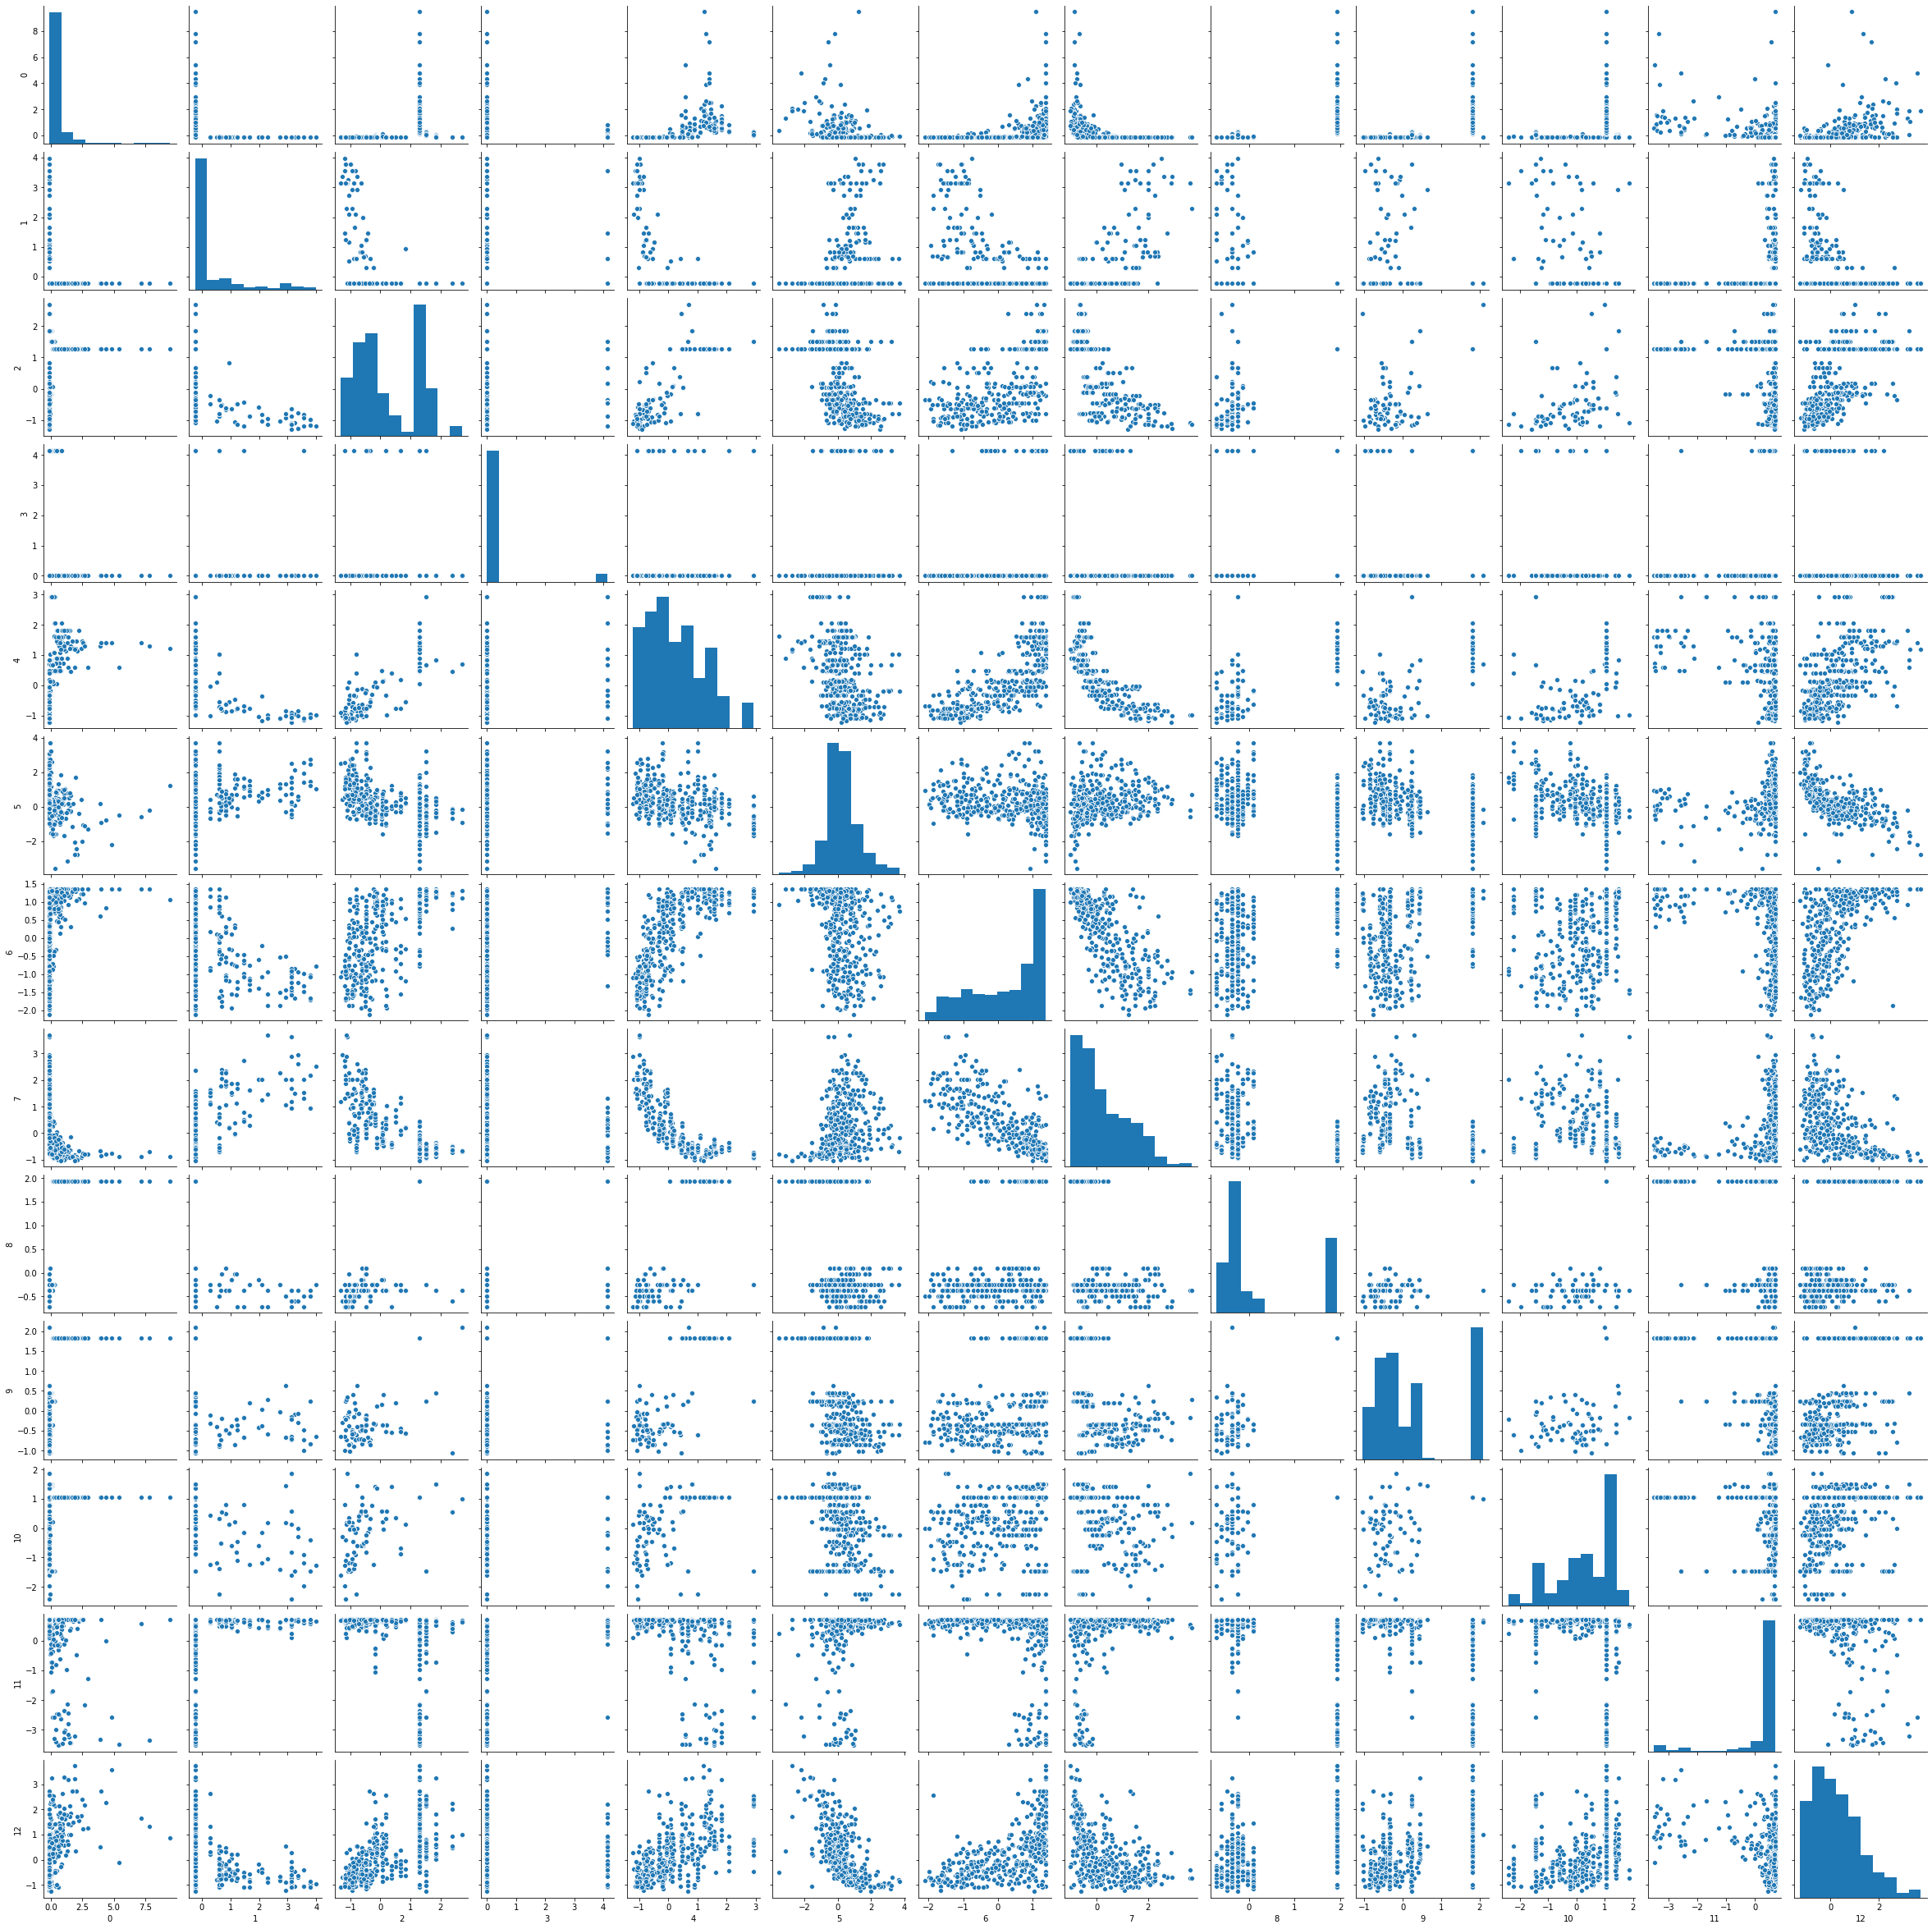

In [0]:
print(keras_model(X_train, y_train, X_test, y_test))
  

2.198173999786377
